<a href="https://colab.research.google.com/github/gourav-prateek-sharma/Capstone-Project-COVER/blob/main/Classification_Task_I(On_one_different_obstacle_config).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
def create_grid(A, M, obstacle_prob=0.1):
    N = int(np.sqrt(M))
    grid = np.zeros((N, N), dtype=int)
    num_obstacles = int(M * obstacle_prob)
    obstacle_positions = np.random.choice(M, num_obstacles, replace=False)

    for pos in obstacle_positions:
        grid[pos // N, pos % N] = 1
    return grid

In [2]:
def plot_grid(grid,tx):
    plt.figure(figsize=(int(np.sqrt(M)), int(np.sqrt(M))))
    plt.imshow(grid, cmap='viridis')

    # Add gridlines
    plt.grid(visible=True, color='white', linewidth=1, which='minor')

    # Setting labels
    plt.xticks(np.arange(grid.shape[1]), labels=np.arange(grid.shape[1]))
    plt.yticks(np.arange(grid.shape[0]), labels=np.arange(grid.shape[0]))

    # Setting gridlines
    plt.xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
    plt.yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)

    # Mark Transmitter
    plt.scatter(tx[1], tx[0], color='green', s=100, label=f"Transmitter {tx}")

    # Mark all Receivers (free cells)
    rx_free = np.argwhere(grid == 0)
    plt.scatter(rx_free[:, 1], rx_free[:, 0], color='blue', s=40, label="Receivers (Free cells)")

    plt.legend()
    plt.title('Grid with Obstacles & All Signal Paths')
    plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def supercover_line(x0, y0, x1, y1):
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    x, y = x0, y0
    n = 1 + dx + dy
    x_inc = 1 if x1 > x0 else -1
    y_inc = 1 if y1 > y0 else -1
    error = dx - dy
    dx *= 2
    dy *= 2

    for _ in range(n):
        points.append((x, y))

        if error > 0:
            x += x_inc
            error -= dy
        else:
            y += y_inc
            error += dx

    rows, cols = zip(*points)
    return np.array(rows), np.array(cols)

def coverage(grid,tx):
    covered = np.zeros_like(grid)
    # Loop over every cell in the grid
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 0:  # Free cell: receiver
                rx = (i, j)
                # Get the path using supercover
                path_rows, path_cols = supercover_line(tx[0], tx[1], rx[0], rx[1])
                # Check if any obstacle is in the path
                obstacles = np.any(grid[path_rows, path_cols] == 1)
                if not obstacles:
                    # Mark the entire path as covered
                    covered[path_rows, path_cols] = 1
                else:
                    # Do not mark receiver if obstacle exists
                    covered[rx[0], rx[1]] = 0
    return covered


In [4]:
def count_blind_spots(grid, covered):
    # Blind spot: free in grid but not covered
    blind_spots = np.sum((grid == 0) & (covered == 0))
    return blind_spots

In [5]:
def brute_force_best_transmitter(grid):
    free_cells = np.argwhere(grid == 0)
    min_blind_spots = np.inf
    best_tx = []
    t=[]
    for tx in free_cells:
      t.append(tx)
      covered = coverage(grid, tx)
      blind_spots = count_blind_spots(grid, covered)

      if blind_spots<min_blind_spots:
          min_blind_spots=blind_spots
          best_tx=[tx]
      elif blind_spots == min_blind_spots:
            best_tx.append(tx)
    return min_blind_spots, best_tx


Grid with Obstacles:
[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


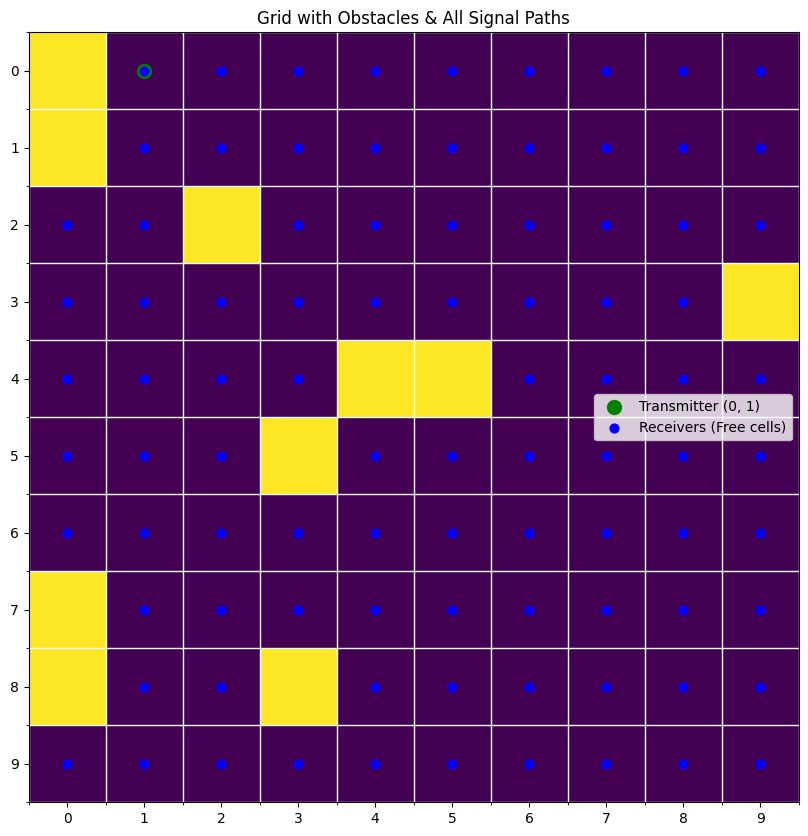

Blind Spots: 31
Best Transmitter Placement: [array([0, 8]), array([3, 8])]
Minimum Blind Spots: 17


In [6]:
A = 10  # Size of area
M = 100  # Number of cells

# Generate the grid
np.random.seed(42)#makes obstacle position constant that is obstacle at the same position every time
grid = create_grid(A, M, obstacle_prob=0.1)
print("Grid with Obstacles:")
print(grid)

tx=(0,1)
covered = coverage(grid,tx)
plot_grid(grid,tx)
# Count blind spots
blind_spots = count_blind_spots(grid, covered)
print(f"Blind Spots: {blind_spots}")

# Find best transmitter placement
min_blind_spots, best_tx = brute_force_best_transmitter(grid)
print(f"Best Transmitter Placement: {best_tx}")
print(f"Minimum Blind Spots: {min_blind_spots}")


# Classification Task-I: Train on one obstacle config and test on another

[[0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1 1 1 0]
 [1 0 0 1 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 1 1 0 0 1]
 [1 0 0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0 0 1]
 [0 0 1 1 0 0 0 1 1 1]
 [0 0 0 1 0 0 0 0 0 1]]


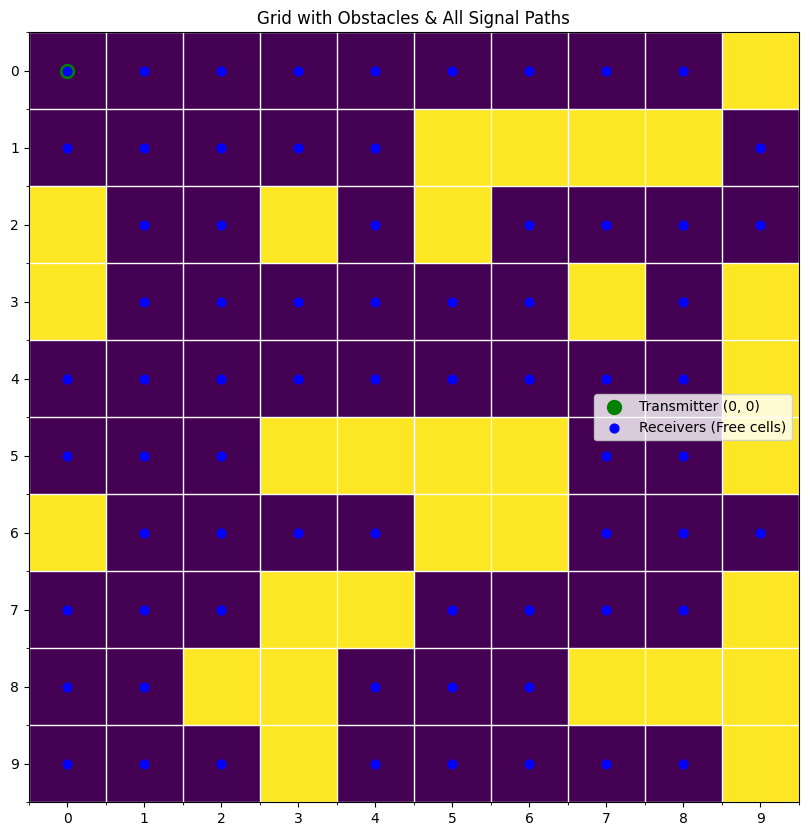

      row  col  obstacle  tx_row  tx_column  covered  \
0       5    4         1       4          0        0   
1       2    0         1       9          4        0   
2       3    6         0       8          5        0   
3       5    1         0       9          0        1   
4       3    5         0       9          6        0   
...   ...  ...       ...     ...        ...      ...   
6995    4    9         1       7          2        0   
6996    5    7         0       8          0        0   
6997    7    4         1       4          5        0   
6998    2    8         0       9          4        0   
6999    5    5         1       8          1        0   

      Blindspot(blocked=1/not blocked=0)  
0                                      0  
1                                      0  
2                                      1  
3                                      0  
4                                      1  
...                                  ...  
6995                      

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
def generate_dataset(grid_size, obstacle_prob=0.3, filename="dataset.csv"):
    dataset_X = []
    dataset_y = []
    A = 10
    M = grid_size ** 2

    grid = create_grid(A, M, obstacle_prob)
    print(grid)
    tx=(0,0)
    plot_grid(grid,tx)
    N = grid.shape[0]

    # Get all free cells (not obstacles)
    free_cells = [(i, j) for i in range(N) for j in range(N) if grid[i, j] == 0]

    for tx in free_cells:
        covered = coverage(grid, tx)
        for i in range(N):
            for j in range(N):
                features = [
                    i,
                    j,
                    grid[i, j],
                    tx[0],
                    tx[1],
                    covered[i, j]
                ]
                if grid[i, j] == 0 and covered[i,j]==0:
                    label = 1
                else:
                  label = 0
                dataset_X.append(features)
                dataset_y.append(label)


    full_data = list(zip(dataset_X, dataset_y))
    np.random.shuffle(full_data)

    dataset_X, dataset_y = zip(*full_data)

    df = pd.DataFrame(dataset_X, columns=['row', 'col', 'obstacle', 'tx_row', 'tx_column', 'covered'])
    df['Blindspot(blocked=1/not blocked=0)'] = dataset_y

    df.to_csv(filename, index=False)

    return df

# Generate and print the dataset
train = generate_dataset(grid_size=10, filename="train.csv")
print(train)


[[0 0 1 0 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 1 0 0 1 0]
 [0 0 1 0 1 0 0 1 1 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 1]
 [1 1 0 0 1 1 0 0 0 1]
 [0 1 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]]


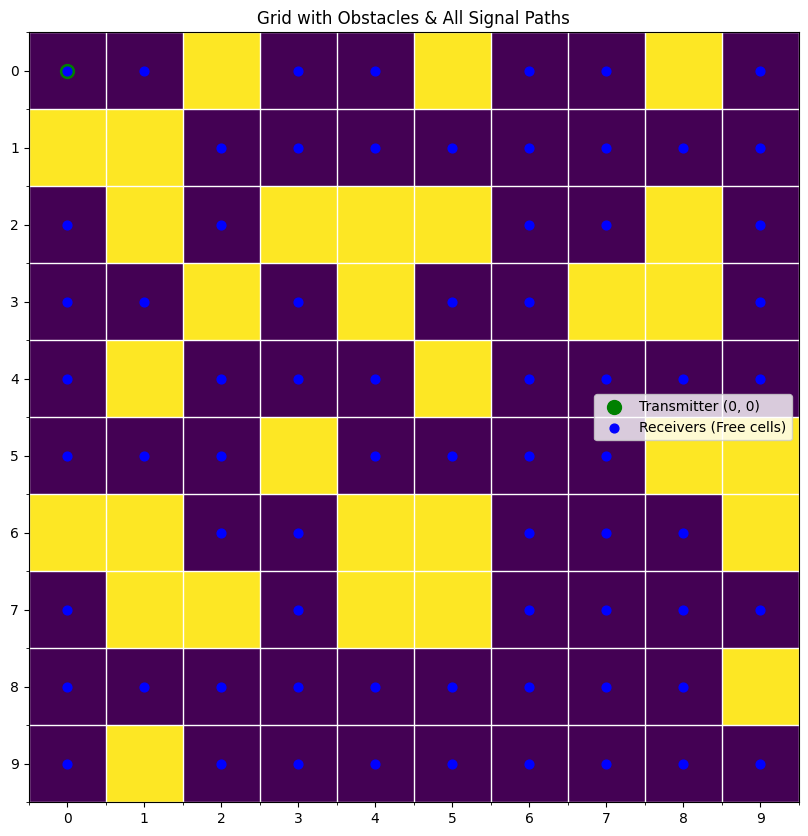

      row  col  obstacle  tx_row  tx_column  covered  \
0       6    3         0       1          4        0   
1       3    6         0       1          3        0   
2       7    4         1       1          9        0   
3       9    4         0       8          7        1   
4       1    5         0       4          6        0   
...   ...  ...       ...     ...        ...      ...   
6995    5    2         0       8          4        0   
6996    6    6         0       3          3        0   
6997    2    5         1       5          7        0   
6998    9    0         0       7          9        0   
6999    9    2         0       7          7        1   

      Blindspot(blocked=1/not blocked=0)  
0                                      1  
1                                      1  
2                                      0  
3                                      0  
4                                      1  
...                                  ...  
6995                      

In [10]:
test=generate_dataset(grid_size=10, filename="test.csv")
print(test)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
'''data = pd.read_csv("grid_dataset.csv")
data['tx_pos'] = '('+data['tx_row'].astype(str) + ',' + data['tx_column'].astype(str)+')'

unique_transmitters = data['tx_pos'].unique()
train_tx, test_tx = train_test_split(unique_transmitters, test_size=0.3, shuffle=True,random_state=30)
#print(train_tx.shape)
print(test_tx)'''

train_data = pd.read_csv("test.csv")
test_data = pd.read_csv("train.csv")

X_train = train_data.drop(['Blindspot(blocked=1/not blocked=0)','covered'], axis=1)
y_train = train_data['Blindspot(blocked=1/not blocked=0)']
X_test = test_data.drop(['Blindspot(blocked=1/not blocked=0)', 'covered'], axis=1)
y_test = test_data['Blindspot(blocked=1/not blocked=0)']

clf = RandomForestClassifier(n_estimators=100,bootstrap=True,random_state=30)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\n## Blind Spot Classification Report\n")
print(classification_report(y_test, y_pred))



## Blind Spot Classification Report

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3548
           1       0.76      0.91      0.83      3452

    accuracy                           0.82      7000
   macro avg       0.83      0.82      0.82      7000
weighted avg       0.83      0.82      0.82      7000



# Implement Task0 on Task1

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
data = pd.read_csv("train.csv")
data['tx_pos'] = data['tx_row'].astype(str) + '_' + data['tx_column'].astype(str)
unique_transmitters = data['tx_pos'].unique()
train_tx, test_tx = train_test_split(unique_transmitters, test_size=0.3, random_state=42)

train_data = data[data['tx_pos'].isin(train_tx)]
test_data = data[data['tx_pos'].isin(test_tx)]

X_train = train_data.drop(['Blindspot(blocked=1/not blocked=0)','covered', 'tx_pos'], axis=1)
y_train = train_data['Blindspot(blocked=1/not blocked=0)']
X_test = test_data.drop(['Blindspot(blocked=1/not blocked=0)','covered', 'tx_pos'], axis=1)
y_test = test_data['Blindspot(blocked=1/not blocked=0)']

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("\n## Blind Spot Classification Report\n")
print(classification_report(y_test, y_pred))


## Blind Spot Classification Report

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1038
           1       0.93      0.92      0.92      1062

    accuracy                           0.92      2100
   macro avg       0.92      0.92      0.92      2100
weighted avg       0.92      0.92      0.92      2100



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
data = pd.read_csv("test.csv")
data['tx_pos'] = data['tx_row'].astype(str) + '_' + data['tx_column'].astype(str)
unique_transmitters = data['tx_pos'].unique()
train_tx, test_tx = train_test_split(unique_transmitters, test_size=0.3, random_state=42)

train_data = data[data['tx_pos'].isin(train_tx)]
test_data = data[data['tx_pos'].isin(test_tx)]

X_train = train_data.drop(['Blindspot(blocked=1/not blocked=0)','covered', 'tx_pos'], axis=1)
y_train = train_data['Blindspot(blocked=1/not blocked=0)']
X_test = test_data.drop(['Blindspot(blocked=1/not blocked=0)','covered', 'tx_pos'], axis=1)
y_test = test_data['Blindspot(blocked=1/not blocked=0)']

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("\n## Blind Spot Classification Report\n")
print(classification_report(y_test, y_pred))


## Blind Spot Classification Report

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       904
           1       0.93      0.94      0.94      1196

    accuracy                           0.93      2100
   macro avg       0.93      0.92      0.92      2100
weighted avg       0.93      0.93      0.93      2100

